# Statistical Quantum AI for a Binary Symetry Model

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

## Binary symetry model

In [2]:
def model(a_bin: int, p_e: float=0.1) -> float:
    """
    Binary symmetry model
    """
    assert a_bin ==0 or a_bin == 1, 'Input a should be binary (0,1)' 
    if np.random.rand() >= p_e:
        return 1.0-2*a_bin # 0->1., 1->-1.
    else:
        return 2*a_bin-1.0 #0->-1., 1->1.

## For fixed input case: x = 0 

In [3]:
dev1 = qml.device("default.qubit", wires=1, shots=1)

@qml.qnode(dev1)
def circuit2(x_ph, w_ph):
    """
    x_ph: input value with phase radian representation
    w_ph: weight value with phase radian representation
    """
    qml.RY(x_ph, wires=0)
    qml.RY(w_ph, wires=0)
    return qml.expval(qml.PauliZ(0))

def cost(x_ph, y_val, w_ph):
    """
    x_ph: input value with phase radian representation
    y_val: output value with -1 to 1 float representation
    w_ph: weight value with phase radian representation    
    """
    return np.power(y_val - circuit2(x_ph, w_ph),2)

dcost = qml.grad(cost, argnum=[2])

In [5]:
w_ph = np.pi
for epoch in range(10):
    x = 0.0
    y_val = model(x, 0)
    x_ph = 0.0 if x == 0 else np.pi
    print(f"{epoch:02}: cost -> ", cost(x_ph, y_val, w_ph), ", w_ph -> ", w_ph)
    w_ph -= 0.1*dcost(x_ph, y_val, w_ph)[0]
    w_ph = np.mod(w_ph, 2*np.pi)

00: cost ->  4.0 , w_ph ->  3.141592653589793
01: cost ->  4.0 , w_ph ->  3.141592653589793
02: cost ->  4.0 , w_ph ->  2.741592653589793
03: cost ->  4.0 , w_ph ->  2.741592653589793
04: cost ->  4.0 , w_ph ->  2.3415926535897933
05: cost ->  4.0 , w_ph ->  1.9415926535897934
06: cost ->  4.0 , w_ph ->  1.9415926535897934
07: cost ->  4.0 , w_ph ->  1.9415926535897934
08: cost ->  4.0 , w_ph ->  1.9415926535897934
09: cost ->  4.0 , w_ph ->  1.9415926535897934


## Varible input case: x = 0 or 1

In [27]:
dev1 = qml.device("default.qubit", wires=1, shots=1)

@qml.qnode(dev1)
def circuit2(x_ph, w_ph):
    """
    x_ph: input value with phase radian representation
    w_ph: weight value with phase radian representation
    """
    qml.RY(x_ph, wires=0)
    qml.RY(w_ph, wires=0)
    return qml.expval(qml.PauliZ(0))

def cost(x_ph, y_val, w_ph):
    """
    x_ph: input value with phase radian representation
    y_val: output value with -1 to 1 float representation
    w_ph: weight value with phase radian representation    
    """
    return np.power(y_val - circuit2(x_ph, w_ph),2)

dcost = qml.grad(cost, argnum=[2])

In [27]:
def train(model_e_rate=0.0, N_batch=100, learning_rate=0.1, w_ph=np.pi):
    x_a = np.random.randint(2, size=N_batch)
    buff = {"cost": [], "w_ph": []}
    for epoch in range(N_batch):
        x = x_a[epoch]
        y_val = model(x, model_e_rate)
        # print(f"y_val = {y_val}")
        x_ph = 0.0 if x == 0 else np.pi
        # print("dcost -> ", dcost(x_ph, y_val, w_ph))
        # print()
        w_ph -= learning_rate*dcost(x_ph, y_val, w_ph)[0]
        w_ph = np.mod(w_ph, 2*np.pi)
        J = cost(x_ph, y_val, w_ph)
        buff["cost"].append(J)
        buff["w_ph"].append(w_ph)
        #if epoch % 10 == 0:
        #    print(f"{epoch:02}: cost -> {J:.1f}, w_ph -> {w_ph:.2f}")
    return buff

N_batch=1000
buff = train(model_e_rate=0.0, N_batch=N_batch, learning_rate=0.01)

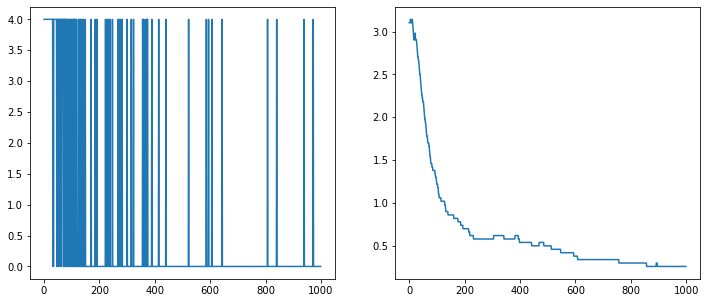

In [28]:
plt.figure(figsize=[12, 5])
plt.subplot(1,2,1)
plt.plot(range(N_batch), buff["cost"])
plt.subplot(1,2,2)
plt.plot(range(N_batch), buff["w_ph"])

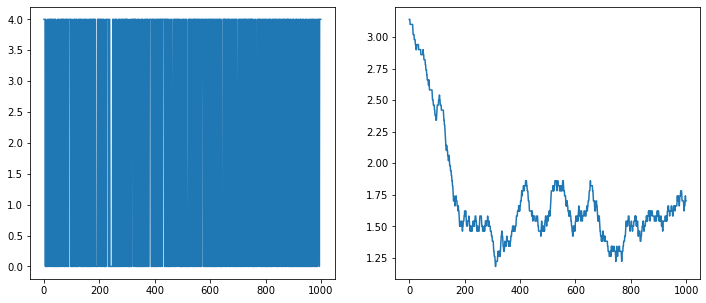

In [29]:
N_batch=1000
buff = train(model_e_rate=0.5, N_batch=N_batch, learning_rate=0.01)
plt.figure(figsize=[12, 5])
plt.subplot(1,2,1)
plt.plot(range(N_batch), buff["cost"])
plt.subplot(1,2,2)
plt.plot(range(N_batch), buff["w_ph"])